# I - Généralités sur le signal et son traitement

## Principes de base

Petit préambule pour rappeler/présenter les notions nécessaires pour la suite. De manière générale, en radar, on envoie un <ins> signal électromagnétique</ins> $s(t)$ définit par [[1](#Bibliographie)]

$$
s(t)=u(t)e^{2i\pi f_c t},
$$

composé du **signal en bande de base** $u(t)$ et de **la porteuse** qui décale cette composante en bande de base à la fréquence $f_c$ dite porteuse (carrier frequency en anglais). Le signal en bande de base $u(t)$ correspond à la forme d'onde envoyée dans le signal radar. Tu le retrouveras souvent écrit de la manière suivante :

$$
u(t)=\frac{\textrm{Rect}\left\{\frac{t}{T}\right\}}{\sqrt{T}}e^{i\phi(t)},
$$

où $T$ représente la <ins>durée d'impulsion</ins> et $\phi(t)$ <ins>la phase</ins>. Le terme $\textrm{Rect}\left\{\frac{t}{T}\right\}$ désigne la fonction porte :

$$
\textrm{Rect}\left\{\frac{t}{T}\right\}=\left \{
\begin{array}{cc}
     &  1~\textrm{for}~-\frac{T}{2}\leq t\leq \frac{T}{2}\\
     &  0~\textrm{sinon}
\end{array} \right. .
$$

On définit par la suite la **fréquence instantanée** *(IF pour Instantaneous Frequency en anglais)*, $f(t)$, comme la dérivée de la phase $\phi(t)$ :

$$
f(t)=\frac{1}{2\pi}\frac{d\phi(t)}{dt},
$$


<div class="alert alert-info" role="alert">
  <b>Note :</b><br>
    Si l'écriture $\frac{\textrm{Rect}\left\{\frac{t}{T}\right\}}{\sqrt{T}}$ peut faire peur de prime abord, c'est surtout pour les équations et les calculs théoriques. La partie $\textrm{Rect}\left\{\frac{t}{T}\right\}$ définit la fonction porte comme dit plus haut et permet simplement de dire que le signal existe sur l'intervalle $[0, T]$ $\left([\frac{-T}{2},\frac{-T}{2}]\textrm{~si centré autour de 0, comme dans la définition}\right)$ et vaut $0$ ailleurs. En pratique, lorsque tu implémenteras des signaux, tu obtiendras ce résultat sans le coder explicitement.<br>
    Pour la partie $\frac{1}{\sqrt{T}}$ cela concerne juste l'amplitude du signal et permet d'avoir un signal à puissance unitaire. Dans la suite du Notebook, en dehors des calculs théoriques de la fonction d'ambiguïté, on pourra considérer une amplitude unitaire.
</div>

## Le chirp

Le **chirp** est LA forme d'onde radar historique (c'est comme les dinosaures sauf qu'elle sert encore beaucoup trop). Il s'agit d'une <span style="color:red">modulation linéaire de fréquence</span> *(LFM pour Linear Frequency Modulation en anglais)* avec >ins>une amplitude constante et un spectre relativement plat</ins>. Pour découvrir l'expression mathématique du chirp, je t'invites à lire le début de la section 4.2 portant sur le chirp dans le Levanon [[1](#Bibliographie)] (La partie fonction d'ambiguïté sera vue plus tard).

<div>
<img src="Images/Samuel_Johnson2.png" width="200" height="200" style="margin:auto"/>
</div>


Maintenant à toi de jouer. Crée ton premier chirp avec les paramètres suivants : 
- Largeur de bande $B = 1e6Hz$
- Durée d'impulsion $T = 5e-5s$
- Fréquence d'échantillonnage de ton choix (Attention au critère de Shannon tout de même - voir la section [Paramètres](#Paramètres) )

L'objectif ici, afficher dans un premier temps le signal en **temporel** puis d'observer son **spectre** (Transformée de Fourier).

<div class="alert alert-info" role="alert">
    <i><b>Remarque :</b></i> Prends l'habitude de mettre des titres/unités à tes figures et à tes axes. 
</div>

In [105]:
# Ton code

<details>
    <summary><b>Aide</b></summary>
    - Si tu veux vérifier ce que tu dois obtenir, charges la commande suivante dans la cellule code au-dessus
    <br>
    <b>%matplotlib ipympl <br>
       %run "chirp.py"</b>
    <br>
    - Si tu veux voir comment la fonction est construite, pareil avec cette commande. <b><span style="color:red">!! ATTENTION !!</span></b> la commande effacera tout ce qui est présent dans ta  cellule
    <br>
    <b>%matplotlib ipympl <br>
       %load "chirp.py"</b>
</details>

# Spectrogramme

Le spectrogramme est un outil de représentation temps-fréquence plutôt pratique et assez visuel en traitement du signal. Il permet de visualiser l'évolution fréquentielle d'un signal au cours du temps. Le signal est 

<div class="alert alert-info" role="alert">
    <i><b>Remarque :</b></i> Les fonctions spectrogrammes existent déjà mais l'implémentation manuelle est largement faisable. Pour comprendre comment on construit un spectrogramme, jettes un coup d'oeil à la Transformée de Fourier à Court Terme (STFT pour Short Time Fourier Transform en anglais) 
</div>

Dans la cellule code suivante, tu peux observer ce que cela donne pour un chirp de bande $B=100$MHz de durée $T=50$µs.

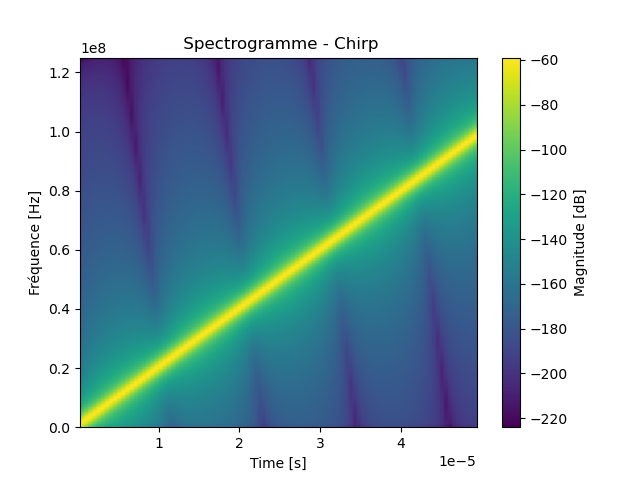

In [14]:
%matplotlib ipympl
%run "Chirp_spectrogram.py"

# <span style="color:blue"> <ins> Paramètres </ins> </span>

Tu as pu créer ton premier chirp et ainsi ton premier signal radar mais tu te demandes peut-être commment choisir les paramètres ($B, T, Fs$) de ta forme d'onde à l'avenir. Il te faut donc comprendre la relation entre ces différents paramètres.

Ta fréquence d'échantillonnage doit respecter de manière générale le critère de Shannon-Nyquist qui implique **que cette fréquence d'échantillonnage soit au moins deux fois supérieure à la fréquence maximale de ton signal**. Dans l'exemple précédent, avec $B=1MHz$, ta fréquence d'échantillonnage doit donc au moins être de $Fs=2MHz$ pour éviter ce qu'on appelle <span style="color:red">le repliement de spectre (aliasing en anglais)</span>. Les graphes ci-dessous illustrent le problème. 

In [ ]:
%matplotlib ipympl
%run "aliasing.py"

<div class="alert alert-info" role="alert">
    <i><b>Remarque :</b></i> Comme on travaille majoritairement en complexe, le spectre varie sur la plage $[-\frac{F_s}{2}, \frac{F_s}{2}]$. On voit donc que pour le second chirp, le spectre "se replie" dans les valeurs négatives. 
</div>

Pour ce qui est de la largeur de bande $B$ et de la durée de ton impulsion $T$, les valeurs tournent souvent autour de la centaine de MHz et de quelques µs pour des applications radars. Il faut avant tout penser que ton signal doit durer assez longtemps pour parcourir ta largeur de bande. Tu peux t'amuser à visualiser les effets de ces deux paramètres sur un chirp avec le graphe ci-dessous.

D:\atorre\anaconda3\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
D:\atorre\anaconda3\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


interactive(children=(FloatSlider(value=1.0, description='B', max=50.0, min=0.5), Output()), _dom_classes=('wi…

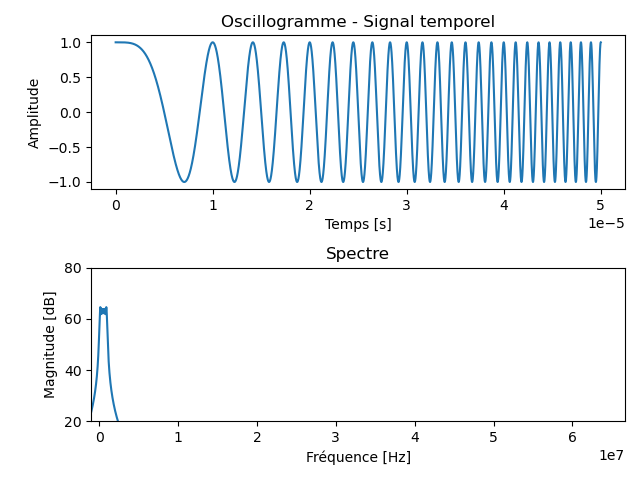

In [9]:
%matplotlib ipympl   
%run "Interactive_Bandwidth.py"

<div class="alert alert-warning" role="alert">
    On vient de voir le chirp mais les formes d'ondes en radar sont nombreuses, tu peux d'ailleurs en voir une liste non exhaustive dans le Levanon 

[[1](#Bibliographie)]
</div>

# <span style="color:blue"> <ins> II - Traitement radar </ins> </span>

## Généralités
Maintenant que la partie signal à l'émission est comprise, qu'en est-il de la réception ? Une fois que notre forme d'onde a été émise, celle-ci parcourt une certaine distance $R$ à la vitesse de la lumière $c$ (onde électromagnétique) jusqu'à ce qu'elle rencontre une cible potentielle. Elle est alors réfléchie pour revenir au radar et être traitée.

<div>
    <img src = "Images/radar_scheme_FR.png" width="400" style="margin:auto"/>
</div>
<p style="text-align:center;"><b>Principe du radar</b></p>

Le signal reçu, $r(t)$, correspond à une version atténuée, bruitée et retardée du signal d'origine, $s(t)$. Il est exprimé comme

$$
r(t)=A_r u(t-\tau(t))e^{2i\pi f_c (t-\tau(t))}+w(t),
$$
où $w(t)$ désigne le bruit blanc Gaussien, tandis que $\tau(t)$ représente **le retard** de la cible et $A_r$ son amplitude. Il est alors possible de déterminer la position et la vitesse de la cible en étudiant le signal reçu. Le retard (<ins>aussi appelé delai</ins>) $\tau(t)$ représente le temps mis par le signal pour parcourir le trajet aller-retour entre le radar et la cible. Cependant, il dépends du temps car influencé par le mouvement relatif entre radar et la cible, qui a une vitesse radiale $v_r$. Pour simplifier, on considère une cible avec une vitesse radiale constante (autrement dit pas d'accélération), ainsi le retard peut s'écrire avec une approximation du premier ordre tel que 

$$
\tau(t) = \tau_0 + \frac{2v_r}{c}t,
$$
où $\tau_0$ est le délai initial correspondant à 
$$
\tau_0 = \frac{2R_0}{c},
$$
avec $R_0$ la distance initiale. On peut noter le facteur $2$ présent car le signal fait le trajet aller-retour. Le délai $\tau(t)$ peut être assimilé à une contraction/dilatation du signal retourné qui affecte aussi bien le signal en bande de base que la fréquence porteuse. L'équation précédente de $r(t)$ peut d'ailleurs s'écrire :
$$
r(t)=A_r u\left(\left(1 - \frac{2v_r}{c}\right)t-\tau_0\right)e^{2i\pi f_c t}e^{-2i\pi f_c\tau_0}e^{-2i\pi f_c \frac{2v_r}{c}t}+w(t).
$$
On peut alors considérer la vitesse radiale $v_r$ très petite devant la vitesse de la lumière et négliger son impact sur le signal en bande de base. Le facteur $\left(1 - \frac{2v_r}{c}\right)$ est responsable de la contraction/dilatation du temps dans le domaine temporel, mais vu que le ratio $\frac{2v_r}{c}<<1$, on le néglige sur la durée d'une impulsion dans la plupart des applications radar et le retard devient juste $\tau_0$. Concernant la fréquence porteuse, l'impact de $v_r$ n'est pas négligeable et est responsable du décalage Doppler $\nu_d$ donné par
$$
\nu_d=-\frac{2v_r}{c}f_c.
$$
Le signal reçu s'écrit finalement
$$
r(t)=A_r u(t-\tau_0)e^{2i\pi f_c t}e^{2i\pi \nu_d t}+w(t).
$$

<div class="alert alert-info" role="alert">
    <i><b>Remarque :</b></i> Pour simplifier dans la suite, le facteur d'atténuation $A_r$ vaut $1$ et le bruit n'est pas modélisé sauf mention contraire (mais tu peux t'amuser à voir son impact à tout moment).
</div>

## Le filtre adapté

On considère dans un premier temps un signal réfléchi pour une cible fixe, autrement dit on ne s'intéresse qu'au retard $\tau_0$ ici (vitesse nulle donc pas de Doppler). L'objectif va être de retrouver cette information à l'aide du filtre adapté (Matched Filter en anglais). 

En radar, le filtre adapté permet de détecter et localiser une cible potentielle en maximisant le rapport signal à bruit SNR (Signal-to-Noise Ratio en anglais). Alors dit comme ça, tu dois sûrement regarder la phrase avec de grand yeux en te demandant ce qui se passe. 

On va déjà faire une petite aparté sur le SNR pour comprendre. Ce rapport signal à bruit représente le ratio entre la puissance de ton signal et la puissance du bruit. On l'exprime très souvent en décibels $[dB]$ et il permet d'indiquer la qualité du signal étudié. Plus ton SNR est bas, plus ton signal est bruité, de mauvaise qualité si tu préfères et inversement si ce SNR est haut. Une image valant mille mots, tu peux contempler le SNR sur les figures suivantes.


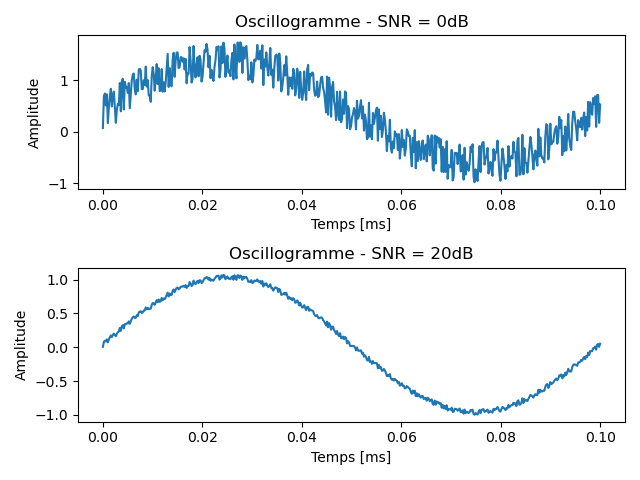

In [37]:
%matplotlib ipympl 
%run "Visualise_SNR.py"

Maintenant, revenons au filtre adapté. Il s'agit tout simplement de la convolution du signal reçu avec le signal de référence, c'est à dire le signal émis. En faisant ainsi, on cherche à faire correspondre le signal de référence avec sa version retardé contenu dans le signal reçu. On atteint alors un maximum au retard $\tau$.



Tu peux avoir un premier aperçu de ce que donne le filtre adapté dans la <a href="https://www.youtube.com/watch?v=yewGWtzQKsw" target="_blank">vidéo</a> suivante.

## La Fonction d'Ambiguïté



Comme en radar les cibles bougent un minimum, il faut à un moment donné prendre en compte leurs vitesse radiales $v_r$ et le décalage Doppler $\nu_d$ que cela induit. Ce décalage Doppler a en effet la fâcheuse tendance de détériorer la réponse de notre filtre adapté qui est optimisé pour un Doppler nul. Pour observer l'impact de ce décalage Doppler sur la sortie du filtre adapté pour une forme d'onde donnée, on peut calculer ce qu'on appelle la **Fonction d'Ambiguïté** (Ambiguity Function en anglais). Cette fonction représente la réponse temps-fréquence du filtre adapté pour un signal reçu avec un retard $\tau$ et un Doppler $\nu_d$ et s'écrit [[1](#Bibliographie)]:

$$
\chi(\tau,\nu_d) = \int_{-\infty}^{+\infty} u(t) u^*(t+\tau)e^{2i\pi\nu_d t}dt
$$

Encore une fois le Levanon est plutôt complet sur ce sujet donc je t'invites vivement à lire la section correspondante ainsi que celle concernant le chirp avant de passer à la suite.


C'est à toi de travailler, essaies d'obtenir la fonction d'ambiguïté du chirp.

In [ ]:
#Ton code

<details>
    <summary><b>Aide</b></summary>
    - Si tu veux vérifier ce que tu dois obtenir, charges la commande suivante dans la cellule code au-dessus
    <br>
    <b>%matplotlib ipympl <br>
       %run "AMBG_chirp.py"</b>
    <br>
    - Si tu veux voir comment la fonction est construite, pareil avec cette commande. <b><span style="color:red">!! ATTENTION !!</span></b> la commande effacera tout ce qui est présent dans ta  cellule
    <br>
    <b>%matplotlib ipympl <br>
       %load "AMBG_chirp.py"</b>
</details>

## Range-Doppler

Jusqu'à maintenant on ne considérait qu'une impulsion mais un radar émet ce qu'on appelle un train d'impulsions. Le radar transmet donc périodiquement des impulsions identiques de durées $T$ séparées par une Période de Répétition des Impulsions $T_r$ (PRI - Pulse Repetition Interval en anglais). Le schéma suivant illustre le cas pour une séquence de chirps.

<div>
    <img src="Images/Pulsetrain_scheme.png" width="400" style="margin:auto"/>
</div>



# Test Hypothèse - Détection

# Bibliographie

  [1] Levanon, Nadav, and Eli Mozeson. Radar Signals. J. Wiley, 2004.
